In [6]:
import sys
import os
import gdal
import numpy as np
import pylab as pl
import skimage
from matplotlib.colors import ListedColormap
from importlib import reload

sys.path.insert(0, '../src')
from deepleeo.dataset import rasterizer
import deepleeo.utils.geofunctions as gf

reload(rasterizer)
reload(gf)

%matplotlib inline

In [7]:
DATA_DIR = "../data_real"
raster_file = os.path.join(DATA_DIR, "Landsat8_225064_17072016_R6G5B4_clip.tif")
#raster_file = os.path.join(DATA_DIR, "Landsat8_225-64_17-07-2016-B1-7.tif")
vector_shp = os.path.join("/home/raian/doutorado/Dados", "prodes_225064_2017_rep.shp")
class_column = "class_name"

In [8]:
raster_img = gf.load_image(raster_file, no_data=-9999) #TODO - Review this method (issue #5)
#raster_ds = gdal.Open(raster_file)
#raster_img = raster_ds.ReadAsArray()
#raster_img = np.rollaxis(raster_img, 0, start=3)
print(raster_img.shape)
print(np.unique(raster_img))

(6166, 6711, 3)
[-236 -147 -130 ... 14272 16036 --]


/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/home/raian/anaconda3/envs/tensorflow/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int16 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(-0.5, 6710.5, 6165.5, -0.5)

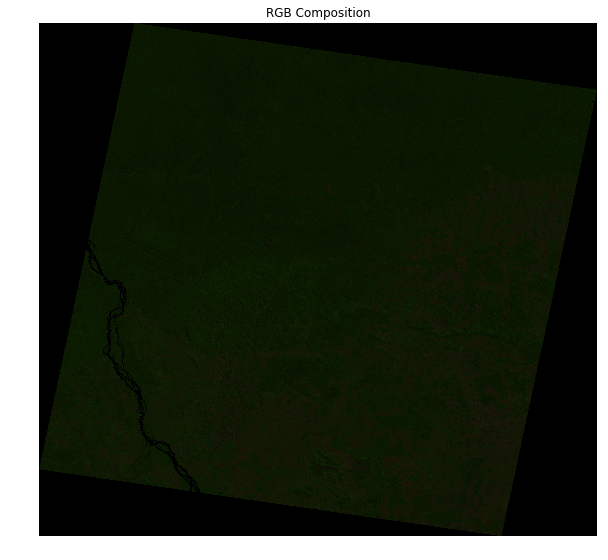

In [9]:
pl.figure(figsize=(10,10))
pl.title('RGB Composition')
raster_img = skimage.img_as_ubyte(raster_img)
pl.imshow(raster_img)
pl.axis('off')

In [10]:
classes_of_interest = ["d2016"]
non_class = "not_deforestation"
rstr = rasterizer.Rasterizer(vector_shp,
                             raster_file,
                             class_column,
                             classes_interest=classes_of_interest,
                             non_class_name=non_class)
#rstr.collect_class_names()
#rstr.rasterize_layer()
rstr.execute()
class_names = rstr.get_class_names()
rasterized_labels = rstr.get_labeled_raster()
print("Class Names: ", class_names)
print(rasterized_labels.shape)
print(np.unique(rasterized_labels))

Class Names:  ['not_deforestation', 'd2016']
(6166, 6711, 1)
[0 1 --]


Raster Shape: (6166, 6711, 1)


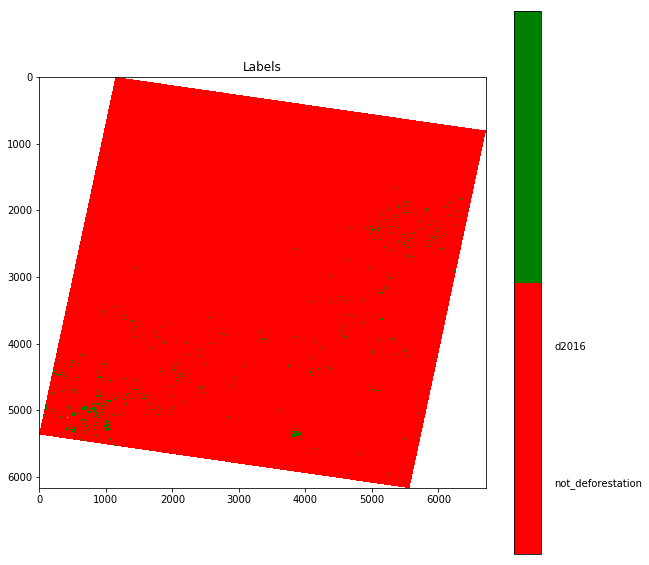

In [16]:
pl.figure(figsize=(10, 10))
pl.title('Labels')
print("Raster Shape:", rasterized_labels.shape)
labels = np.ma.masked_where(rasterized_labels == 255, rasterized_labels)

colorMap = ListedColormap(["red", "green"])#, "blue", "yellow"])
pl.imshow(rasterized_labels[:,:,0], cmap=colorMap)
cbar = pl.colorbar()
cbar.ax.get_yaxis().set_ticks([])

for j, lab in enumerate(class_names):
    cbar.ax.text(1.5, (2 * j + 1) / 8, lab, ha='left')

cbar.ax.get_yaxis().labelpad = 15
#cbar.ax.set_yticklabels(class_names)